## 빅데이터 기반 AI 응용 솔루션 개발자 전문과정

### 교과목명 : 분석용 데이터셋 구축
- 평가일 : 21.8.6
- 성명 : 신인철
- 점수 : 100점

### Q1. 타이타닉 생존자 예측모델 개발을 위한 Titanic 분석용 데이터셋을 생성한 후 주어진 방법으로 예측 정확도를 평가하세요.

#### Titanic data 전처리
- 분석 데이터 : titanic3.csv
- 재사용 가능한 전처리 사용자 함수 작성 하여 전처리
    - Null 값 처리 : Age는 평균나이, 나머지 칼럼은 'N'값으로 변경
    - 불필요한 속성 칼럼 삭제
    - 문자열 칼럼 레이블 인코딩
- 통계적, 시각적 탐색을 통한 다양한 인사이트 도출
- 탐색적 분석을 통한 feature engineering, 파생변수 

#### 컬럼 정보

- survived : 생존여부(1: 생존, 0 : 사망)
- pclass : 승선권 클래스(1 : 1st, 2 : 2nd ,3 : 3rd)
- name : 승객 이름
- sex : 승객 성별
- age : 승객 나이
- sibsp : 동반한 형제자매, 배우자 수
- parch : 동반한 부모, 자식 수
- ticket : 티켓의 고유 넘버
- fare 티켓의 요금
- cabin : 객실 번호
- embarked : 승선한 항구명(C : Cherbourg, Q : Queenstown, S : Southampton)
- boat
- body
- home.dest

#### 점수 산정
- 예측 정확도 0.87 이상 50점
- 예측 정확도 0.85 이상 45점
- 예측 정확도 0.84 이하 정확도/2점

In [1419]:
import pandas as pd
titanic_df = pd.read_csv('./dataset/titanic3.csv')
titanic_df.head(2)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"


In [1420]:
df = titanic_df.drop(['name','ticket','cabin','embarked','boat','body','home.dest'],axis=1)
df.head()

,pclass,survived,sex,age,sibsp,parch,fare
0,1,1,female,29.00,0,0,211.3375
1,1,1,male,0.92,1,2,151.5500
2,1,0,female,2.00,1,2,151.5500
3,1,0,male,30.00,1,2,151.5500
4,1,0,female,25.00,1,2,151.5500


In [1421]:
df = df.dropna(subset=['age'],how='any',axis=0)
df['fare'] = df['fare'].fillna(df['fare'].mean())
df.head()

,pclass,survived,sex,age,sibsp,parch,fare
0,1,1,female,29.00,0,0,211.3375
1,1,1,male,0.92,1,2,151.5500
2,1,0,female,2.00,1,2,151.5500
3,1,0,male,30.00,1,2,151.5500
4,1,0,female,25.00,1,2,151.5500


In [1422]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])
df.head()

,pclass,survived,sex,age,sibsp,parch,fare
0,1,1,0,29.00,0,0,211.3375
1,1,1,1,0.92,1,2,151.5500
2,1,0,0,2.00,1,2,151.5500
3,1,0,1,30.00,1,2,151.5500
4,1,0,0,25.00,1,2,151.5500


In [1423]:
df['age'] = pd.cut(df['age'],5,labels=[1,2,3,4,5])

In [1424]:


def fare_tran(fare):
    if fare == 0 :
        fc = 0
    elif fare <= 10 :
        fc = 1
    elif fare <= 30 :
        fc = 2
    elif fare <= 60 :
        fc = 3
    elif fare <= 90 :
        fc = 4
    else :
        fc = 5
    return fc

df['fare'] = df['fare'].apply(fare_tran).astype(int)
df.head()

,pclass,survived,sex,age,sibsp,parch,fare
0,1,1,0,2,0,0,5
1,1,1,1,1,1,2,5
2,1,0,0,1,1,2,5
3,1,0,1,2,1,2,5
4,1,0,0,2,1,2,5


<AxesSubplot:xlabel='pclass', ylabel='survived'>

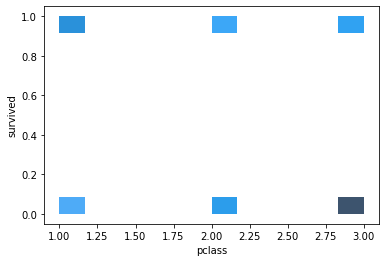

In [1425]:
import seaborn as sns
sns.histplot(x='pclass',y='survived',data=df)
# 3등급 객실에 탄 승객들이 가장 많이 죽었다

In [1426]:
df.corr()

,pclass,survived,sex,sibsp,parch,fare
pclass,1.000000,-0.320486,0.144695,0.047221,0.017224,-0.741548
survived,-0.320486,1.000000,-0.538000,-0.012213,0.114438,0.295539
sex,0.144695,-0.538000,1.000000,-0.095267,-0.221144,-0.243560
sibsp,0.047221,-0.012213,-0.095267,1.000000,0.374456,0.261905
parch,0.017224,0.114438,-0.221144,0.374456,1.000000,0.299795
fare,-0.741548,0.295539,-0.243560,0.261905,0.299795,1.000000


In [1469]:
# 모델 평가 준비 작업
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# 독립변수, 종속변수 분리
y_t_df = df['survived'] # 종속변수
X_t_df = df.drop(['survived','sibsp','parch','fare'], axis = 1) # 독립변수

# 독립변수 정규화
# X_t_df = preprocessing.StandardScaler().fit(X_t_df).transform(X_t_df)

# 학습용 데이터와 평가용 데이터를 8:2 혹은 7:3으로 분리
X_train, X_test, y_train, y_test = train_test_split(X_t_df, y_t_df, test_size = 0.2,
                                                   random_state = 5)

print(X_train.shape)
print(X_test.shape)


(836, 3)
(210, 3)


In [1470]:
# 모델 학습 및 평가
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, rf_pred).round(2)

lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)
lr_pred = lr_model.predict(X_test)
accuracy_lr = accuracy_score(y_test,lr_pred).round(2)

print('rf 정확도:{}, lr 정확도:{}'.format(accuracy_rf,accuracy_lr))

rf 정확도:0.87, lr 정확도:0.81


### Q2. 고객 속성 및 거래 데이터를 아래 제시된 방법으로 생성 후 다음 과제를 수행하세요.

[고객별 속성 데이터]  
- id : 1번 ~ 100번 일련번호
- gender : 0,1 정수 난수 생성
- age : 10 ~ 80사이 정수 난수를 생성하고 범주화하여 age_cat 파생
- region : 1 ~ 5 사이 정수 난수 생성

[거래 데이터]  
- id : 1번 ~ 100번 일련번호(관측치 1000개)
- product : 고급제품(hpd), 일반제품(lpd)로 구분
- price : 100 ~ 200 사이 정수 난수 생성
- qty : 1 ~ 2 사이 정수 난수 생성
- day : 요일
- date : 2020-01-01 ~ 2021-12-31 사이의 날짜 1000개 생성
- amount : price * qty로 산출

[과제]  
- 고객 속성(id, 성별, 연령, 거주지역) 데이터와 거래 데이터를 통합한 데이터 프레임 df를 생성하세요.
- df를 수정하여 5가지 이상의 인사이트를 포함한 데이터 셋으로 변환하세요
- df 를 탐색적 분석을 통하여 인사이트를 도출하세요.

#### 점수 산정
- 인사이트 개수에 따라 점수 부여: 5개 50점,4개 45점,3개 40점,2개 35점,1개 30점

In [1429]:
import numpy as np

pid = np.arange(1,101)
pid = pd.Series(pid)
gender = np.random.randint(2,size=100)
gender = pd.Series(gender)
age = np.random.randint(10,81,100)
age = pd.Series(age)
region = np.random.randint(1,6,100)
region = pd.Series(region)

dfe = pd.concat([pid,gender,age,region],axis=1)
dfe.columns = ['pid','gender','age','region']
dfe.head()


,pid,gender,age,region
0,1,0,64,1
1,2,0,76,2
2,3,0,80,1
3,4,0,34,4
4,5,0,41,4


In [1430]:
zw = np.zeros((1000,6))
df2 = pd.DataFrame(zw,columns=['pid','product','price','qty','day','date'])
df2.head()

,pid,product,price,qty,day,date
0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0


[거래 데이터]  
- id : 1번 ~ 100번 일련번호(관측치 1000개)
- product : 고급제품(hpd), 일반제품(lpd)로 구분
- price : 100 ~ 200 사이 정수 난수 생성
- qty : 1 ~ 2 사이 정수 난수 생성
- day : 요일
- date : 2020-01-01 ~ 2021-12-31 사이의 날짜 1000개 생성
- amount : price * qty로 산출

In [1431]:
df2['pid'] = np.random.randint(1,101,1000)
df2['product'] = np.random.randint(0,2,1000)
df2['price'] = np.random.randint(100,201,1000)
df2['qty'] = np.random.randint(1,3,1000)
df2['date'] = pd.date_range(start='2020-01-01',end='2021-12-31',periods=1000)
df2['day'] = df2['date'].dt.dayofweek
df2['year'] = df2['date'].dt.year
df2.head()

,pid,product,price,qty,day,date,year
0,73,0,101,1,2,2020-01-01 00:00:00.000000000,2020
1,79,0,145,1,2,2020-01-01 17:32:15.135135135,2020
2,41,1,156,2,3,2020-01-02 11:04:30.270270270,2020
3,88,1,190,1,4,2020-01-03 04:36:45.405405405,2020
4,69,0,124,1,4,2020-01-03 22:09:00.540540540,2020


In [1432]:
def age_cat(age):
    if age <= 20 : cat = 1
    elif age <= 30 : cat = 2
    elif age <= 40 : cat = 3
    elif age <= 50 : cat = 4
    elif age <= 60 : cat = 5
    else: cat = 6
    return cat
dfe['age'] = dfe['age'].apply(age_cat)
dfe.head()

,pid,gender,age,region
0,1,0,6,1
1,2,0,6,2
2,3,0,6,1
3,4,0,3,4
4,5,0,4,4


In [1433]:
pdf = df2.drop(['date'],axis=1)
pdf.head()

,pid,product,price,qty,day,year
0,73,0,101,1,2,2020
1,79,0,145,1,2,2020
2,41,1,156,2,3,2020
3,88,1,190,1,4,2020
4,69,0,124,1,4,2020


In [1434]:
def pp_val(product,price):
    if product == 0:
        return price * 50
    else :
        return price * 10

def pq_val(product,qty):
    if product == 0:
        return qty * 20
    else :
        return qty * 100

pdf['price'] = pdf.apply(lambda x : pp_val(x['product'],x['price']),axis=1)
pdf['qty'] = pdf.apply(lambda x : pq_val(x['product'],x['qty']),axis=1)

pdf.head()

,pid,product,price,qty,day,year
0,73,0,5050,20,2,2020
1,79,0,7250,20,2,2020
2,41,1,1560,200,3,2020
3,88,1,1900,100,4,2020
4,69,0,6200,20,4,2020


In [1435]:
pdf['amount'] = pdf['price'] * pdf['qty']
pdf.head()

,pid,product,price,qty,day,year,amount
0,73,0,5050,20,2,2020,101000
1,79,0,7250,20,2,2020,145000
2,41,1,1560,200,3,2020,312000
3,88,1,1900,100,4,2020,190000
4,69,0,6200,20,4,2020,124000


In [1436]:
# 2020년에는 월,화 휴무일 2021년은 연중무휴
def in0(year,day):
    if (year == 2020) & (day < 2):
        return np.nan
    else :
        return day
pdf['day'] = pdf.apply(lambda x: in0(x['year'],x['day']),axis=1)

pdf['day'].isnull().sum()

142

In [1437]:
pdf = pdf.dropna(subset=['day'],how='any',axis=0)
pdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 858 entries, 0 to 999
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   pid      858 non-null    int64  
 1   product  858 non-null    int64  
 2   price    858 non-null    int64  
 3   qty      858 non-null    int64  
 4   day      858 non-null    float64
 5   year     858 non-null    int64  
 6   amount   858 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 53.6 KB


In [1438]:
# 2020년 코로나로 인해 저가품목 매출 감소
def in1(year,product,amount):
    if (year == 2020) & (product == 1):
        return amount * 0.7
    else : 
        return amount

pdf['amount'] = pdf.apply(lambda x: in1(x['year'],x['product'],x['amount']),axis=1)
pdf.head(2)

,pid,product,price,qty,day,year,amount
0,73,0,5050,20,2.0,2020,101000.0
1,79,0,7250,20,2.0,2020,145000.0


In [1439]:
# 2021년 물가 상승 예측으로 2020년 고가제품 사재기로 인해 매출 상승
def in2(year,product,amount):
    if (year == 2020) & (product == 0):
        return amount + (amount * 0.5)
    else :
        return amount

pdf['amount'] = pdf.apply(lambda x: in2(x['year'],x['product'],x['amount']),axis=1)
pdf.head(2)

,pid,product,price,qty,day,year,amount
0,73,0,5050,20,2.0,2020,151500.0
1,79,0,7250,20,2.0,2020,217500.0


In [1440]:
# 2021년 반도체 부족으로 고가제품 매출 감소
def in3(year,product,amount):
    if (year == 2021) & (product == 0):
        return amount * 0.6
    else:
        return amount

pdf['amount'] = pdf.apply(lambda x:in3(x['year'],x['product'],x['amount']),axis=1)
pdf.head(2)

,pid,product,price,qty,day,year,amount
0,73,0,5050,20,2.0,2020,151500.0
1,79,0,7250,20,2.0,2020,217500.0


In [1441]:
# 2021년 물가 상승으로 저가제품 판매 수 대비 매출 상승
def in4(year,product,amount):
    if (year == 2021) & (product == 1):
        return amount + (amount * 0.3)
    else :
        return amount

pdf['amount'] = pdf.apply(lambda x: in4(x['year'],x['product'],x['amount']),axis=1)
pdf.head()

,pid,product,price,qty,day,year,amount
0,73,0,5050,20,2.0,2020,151500.0
1,79,0,7250,20,2.0,2020,217500.0
2,41,1,1560,200,3.0,2020,218400.0
3,88,1,1900,100,4.0,2020,133000.0
4,69,0,6200,20,4.0,2020,186000.0


In [1442]:
pdf.groupby(['product','year'])['amount'].sum()

product  year
0        2020    57949500.0
         2021    33687000.0
1        2020    29516200.0
         2021    70855200.0
Name: amount, dtype: float64

In [1443]:
pdf['yp'] = pdf[['year','product']].astype(str).apply('_'.join,axis=1)
pdf.head()

,pid,product,price,qty,day,year,amount,yp
0,73,0,5050,20,2.0,2020,151500.0,2020_0
1,79,0,7250,20,2.0,2020,217500.0,2020_0
2,41,1,1560,200,3.0,2020,218400.0,2020_1
3,88,1,1900,100,4.0,2020,133000.0,2020_1
4,69,0,6200,20,4.0,2020,186000.0,2020_0


In [1444]:
pvt1 = pd.pivot_table(pdf,index='pid',columns='yp',values='amount',aggfunc='sum')
pvt1.head()

yp,2020_0,2020_1,2021_0,2021_1
pid,,,,
1,501000.0,428400.0,240000.0,982800.0
2,213000.0,NaN,62400.0,808600.0
3,558000.0,NaN,324600.0,492700.0
4,1060500.0,98000.0,420600.0,NaN
5,886500.0,390600.0,768600.0,591500.0


In [1445]:
pvt1['2020_0'].fillna(pvt1['2020_0'].mean(),inplace=True)
pvt1['2020_1'].fillna(pvt1['2020_1'].mean(),inplace=True)
pvt1['2021_0'].fillna(pvt1['2021_0'].mean(),inplace=True)
pvt1['2021_1'].fillna(pvt1['2021_1'].mean(),inplace=True)
pvt1.columns.name = None
pvt1.reset_index(inplace=True)
pvt1.head()

,pid,2020_0,2020_1,2021_0,2021_1
0,1,501000.0,428400.000000,240000.0,982800.000000
1,2,213000.0,359953.658537,62400.0,808600.000000
2,3,558000.0,359953.658537,324600.0,492700.000000
3,4,1060500.0,98000.000000,420600.0,778628.571429
4,5,886500.0,390600.000000,768600.0,591500.000000


In [1446]:
pvt1['2020_0'] = (pvt1['2020_0'] / pvt1['2020_0'].sum()) * 100
pvt1['2020_1'] = (pvt1['2020_1'] / pvt1['2020_1'].sum()) * 100
pvt1['2021_0'] = (pvt1['2021_0'] / pvt1['2021_0'].sum()) * 100
pvt1['2021_1'] = (pvt1['2021_1'] / pvt1['2021_1'].sum()) * 100
pvt1.head()

,pid,2020_0,2020_1,2021_0,2021_1
0,1,0.682991,1.190153,0.662570,1.262219
1,2,0.290374,1.000000,0.172268,1.038493
2,3,0.760697,1.000000,0.896126,0.632779
3,4,1.445733,0.272257,1.161154,1.000000
4,5,1.208526,1.085140,2.121881,0.759669


In [1447]:
pvt1['hv'] = (pvt1['2021_0'] - pvt1['2020_0']) / pvt1['2020_0']
pvt1['lv'] = (pvt1['2021_1'] - pvt1['2020_1']) / pvt1['2020_1']
pvt2 = pvt1[['pid','hv','lv']]
pvt2.head()

,pid,hv,lv
0,1,-0.029899,0.060552
1,2,-0.406736,0.038493
2,3,0.178033,-0.367221
3,4,-0.196840,2.672997
4,5,0.755759,-0.299934


In [1448]:
dfe = pd.merge(dfe,pvt2,on='pid',how='outer')
dfe.head()

,pid,gender,age,region,hv,lv
0,1,0,6,1,-0.029899,0.060552
1,2,0,6,2,-0.406736,0.038493
2,3,0,6,1,0.178033,-0.367221
3,4,0,3,4,-0.196840,2.672997
4,5,0,4,4,0.755759,-0.299934


In [1449]:
dfe.corr()

,pid,gender,age,region,hv,lv
pid,1.000000,-0.026029,-0.006112,-0.069458,-0.142016,0.043828
gender,-0.026029,1.000000,-0.000561,-0.008566,0.055008,0.012534
age,-0.006112,-0.000561,1.000000,0.069776,-0.063529,0.166397
region,-0.069458,-0.008566,0.069776,1.000000,0.063072,-0.027381
hv,-0.142016,0.055008,-0.063529,0.063072,1.000000,-0.173641
lv,0.043828,0.012534,0.166397,-0.027381,-0.173641,1.000000


In [1450]:
df1 = pdf[['pid','year','amount']]
piv = pd.pivot_table(df1,index='pid',columns='year',values='amount',aggfunc='sum')
piv.columns.name = None
piv.reset_index(inplace=True)
piv.head()

,pid,2020,2021
0,1,929400.0,1222800.0
1,2,213000.0,871000.0
2,3,558000.0,817300.0
3,4,1158500.0,420600.0
4,5,1277100.0,1360100.0


In [1451]:
piv.isnull().sum()

pid     0
2020    2
2021    0
dtype: int64

In [1452]:
piv[2020].fillna(piv[2020].mean(),inplace=True)
piv[2021].fillna(piv[2021].mean(),inplace=True)
piv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pid     100 non-null    int64  
 1   2020    100 non-null    float64
 2   2021    100 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [1453]:
dfe = pd.merge(dfe,piv,on='pid',how='outer')
dfe.head()

/Users/shin-incheol/downloads/d/lib/python3.9/site-packages/IPython/core/displayhook.py:275: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  warn('Output cache limit (currently {sz} entries) hit.\n'


,pid,gender,age,region,hv,lv,2020,2021
0,1,0,6,1,-0.029899,0.060552,929400.0,1222800.0
1,2,0,6,2,-0.406736,0.038493,213000.0,871000.0
2,3,0,6,1,0.178033,-0.367221,558000.0,817300.0
3,4,0,3,4,-0.196840,2.672997,1158500.0,420600.0
4,5,0,4,4,0.755759,-0.299934,1277100.0,1360100.0


In [1454]:
dfe['ratio'] = (dfe[2021] - dfe[2020]) / dfe[2020]
dfe.head()

,pid,gender,age,region,hv,lv,2020,2021,ratio
0,1,0,6,1,-0.029899,0.060552,929400.0,1222800.0,0.315688
1,2,0,6,2,-0.406736,0.038493,213000.0,871000.0,3.089202
2,3,0,6,1,0.178033,-0.367221,558000.0,817300.0,0.464695
3,4,0,3,4,-0.196840,2.672997,1158500.0,420600.0,-0.636944
4,5,0,4,4,0.755759,-0.299934,1277100.0,1360100.0,0.064991


In [1455]:
# 인사이트 예시(요약 기술 및 관련 통계 및 시각화 제시)
# 일반제품의 변화율인 lpd 컬럼과 구매증감율 ratio의 상관관계가 0.5 초과
import seaborn as sns
df2 = dfe.drop([2020,2021],axis=1)
df2.head()

,pid,gender,age,region,hv,lv,ratio
0,1,0,6,1,-0.029899,0.060552,0.315688
1,2,0,6,2,-0.406736,0.038493,3.089202
2,3,0,6,1,0.178033,-0.367221,0.464695
3,4,0,3,4,-0.196840,2.672997,-0.636944
4,5,0,4,4,0.755759,-0.299934,0.064991


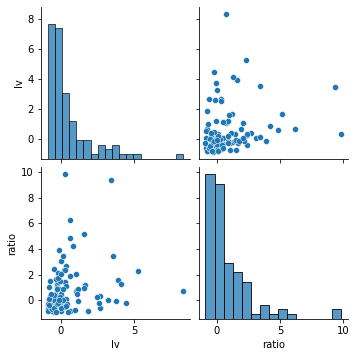

In [1456]:
sns.pairplot(df2[['lv','ratio']])
# 위의 예시처럼 상관관계가 높은 것을 관찰 할 수 있다

<AxesSubplot:xlabel='age', ylabel='lv'>

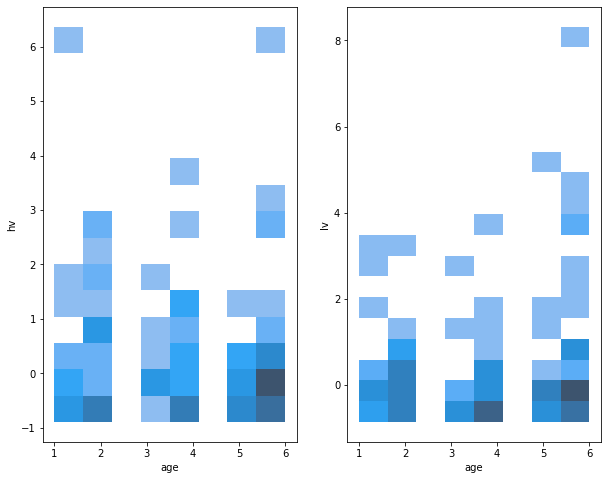

In [1457]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
sns.histplot(x='age',y='hv',data=df2)
plt.subplot(1,2,2)
sns.histplot(x='age',y='lv',data=df2)
# 나이가 많을 수록 고가의 제품을 많이 구매한다
# 저가형 제품은 나이에 상관없이 골고루 구매한다

<AxesSubplot:xlabel='gender', ylabel='hv'>

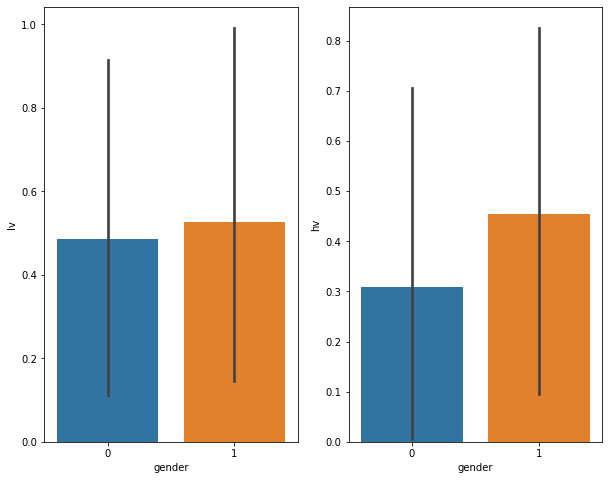

In [1458]:
df2.corr()
plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
sns.barplot(x='gender',y='lv',data=df2)
# 0번 성별이 저가제품을 많이 구매한다 따라서 집안일을 도 맡아서 할 가능성이 높다
plt.subplot(1,2,2)
sns.barplot(x='gender',y='hv',data=df2)
# 1번 성별은 고가의 제품을 더 많이 구매하는 경향이 있다


In [1459]:
df2.corr()

,pid,gender,age,region,hv,lv,ratio
pid,1.000000,-0.026029,-0.006112,-0.069458,-0.142016,0.043828,-0.077638
gender,-0.026029,1.000000,-0.000561,-0.008566,0.055008,0.012534,0.024957
age,-0.006112,-0.000561,1.000000,0.069776,-0.063529,0.166397,-0.058842
region,-0.069458,-0.008566,0.069776,1.000000,0.063072,-0.027381,-0.214584
hv,-0.142016,0.055008,-0.063529,0.063072,1.000000,-0.173641,0.251309
lv,0.043828,0.012534,0.166397,-0.027381,-0.173641,1.000000,0.206542
ratio,-0.077638,0.024957,-0.058842,-0.214584,0.251309,0.206542,1.000000


<AxesSubplot:xlabel='gender', ylabel='ratio'>

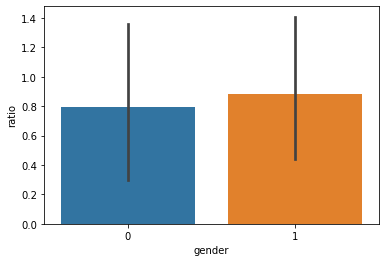

In [1460]:
sns.barplot(x='gender',y='ratio',data=df2)
# 1번 성별이 매출증가에 0번 보다 더 많이 기여했다

<AxesSubplot:xlabel='age', ylabel='ratio'>

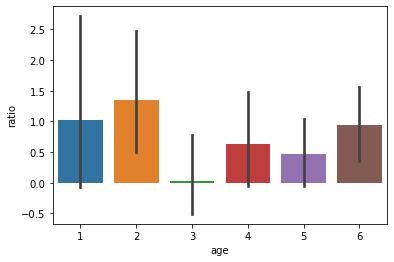

In [1461]:
sns.barplot(x='age',y='ratio',data=df2)
# 4번 카테고리의 나이대는 매출 증감에 가장 영향이 없었고 6번 카테고리의 나이대가 가장 영향을 많이 주었다

<AxesSubplot:xlabel='region', ylabel='hv'>

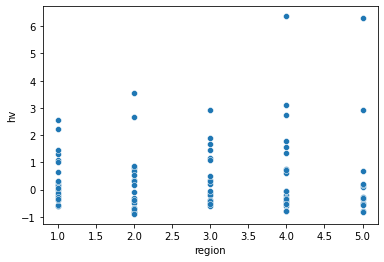

In [1462]:
sns.scatterplot(x='region',y='hv',data=df2)
# 고가제품의 매출 국적은 골고루 분포해 있다 / 국적이랑 고가제품의 매출은 상관 x

In [1463]:
df2.corr()

,pid,gender,age,region,hv,lv,ratio
pid,1.000000,-0.026029,-0.006112,-0.069458,-0.142016,0.043828,-0.077638
gender,-0.026029,1.000000,-0.000561,-0.008566,0.055008,0.012534,0.024957
age,-0.006112,-0.000561,1.000000,0.069776,-0.063529,0.166397,-0.058842
region,-0.069458,-0.008566,0.069776,1.000000,0.063072,-0.027381,-0.214584
hv,-0.142016,0.055008,-0.063529,0.063072,1.000000,-0.173641,0.251309
lv,0.043828,0.012534,0.166397,-0.027381,-0.173641,1.000000,0.206542
ratio,-0.077638,0.024957,-0.058842,-0.214584,0.251309,0.206542,1.000000


In [1464]:
def mknewcol(a,b):
    if b >= a :
        return 1
    else :
        return 0

dfe['target'] = dfe.apply(lambda x: mknewcol(x[2020],x[2021]),axis=1)
dfe.head()

,pid,gender,age,region,hv,lv,2020,2021,ratio,target
0,1,0,6,1,-0.029899,0.060552,929400.0,1222800.0,0.315688,1
1,2,0,6,2,-0.406736,0.038493,213000.0,871000.0,3.089202,1
2,3,0,6,1,0.178033,-0.367221,558000.0,817300.0,0.464695,1
3,4,0,3,4,-0.196840,2.672997,1158500.0,420600.0,-0.636944,0
4,5,0,4,4,0.755759,-0.299934,1277100.0,1360100.0,0.064991,1


In [1465]:
y = dfe['target']
x = dfe.drop(['target','pid','ratio',2020,2021],axis=1)

In [1466]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# 독립변수, 종속변수 분리
y_t_df = y # 종속변수
X_t_df = x # 독립변수

# 독립변수 정규화
# X_t_df = preprocessing.StandardScaler().fit(X_t_df).transform(X_t_df)

# 학습용 데이터와 평가용 데이터를 8:2 혹은 7:3으로 분리
X_train, X_test, y_train, y_test = train_test_split(X_t_df, y_t_df, test_size = 0.2,
                                                   random_state = 4)

print(X_train.shape)
print(X_test.shape)


(80, 5)
(20, 5)


In [1467]:
# 모델 학습 및 평가
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, rf_pred).round(2)

lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)
lr_pred = lr_model.predict(X_test)
accuracy_lr = accuracy_score(y_test,lr_pred).round(2)

print('rf 정확도:{}, lr 정확도:{}'.format(accuracy_rf,accuracy_lr))

rf 정확도:0.9, lr 정확도:0.9
